# Problem Set 1 
## Computation ACME_Number Differentiation 
### 8. Differentiation 


* July 1, 2019
* SP Tian 

### Problem 1 

$(-log(sin(x) + 1)sin(x)cos(cos(x)) + sin(cos(x))cos(x)/(sin(x) + 1))sin(x) + 1)^{sin(cos(x)}$
- Lambdify the resulting so it can accept np arrays

In [1]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt
from sympy.utilities.lambdify import lambdify

In [2]:
x = sy.symbols('x')
expr = (sy.sin(x)+1) ** (sy.sin(sy.cos(x)))
f1 = lambdify(x, expr, modules = 'numpy')
func = lambdify(x, sy.diff(expr, x), modules = "numpy")

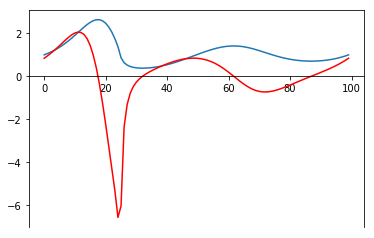

In [3]:
xgrid = np.linspace(-np.pi, np.pi, 100)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

ax.plot(f1(xgrid))
ax.plot(func(xgrid), 'r')
plt.show()

### Problem 2

In [4]:
x0, h= sy.symbols('x_0,h')
f = sy.Function('f')

In [5]:
def derivative(f, a, h, method='central'):
    '''Compute the difference formula for f'(a) with step size h.

    Parameters
    ----------
    f : function
        Vectorized function of one variable
    a : number
        Compute derivative at x = a
    method : string
        Difference formula: 'forward', 'backward' or 'central'
    h : number
        Step size in difference formula

    Returns
    -------
    float
        Difference formula:
            central: f(a+h) - f(a-h))/2h
            forward: f(a+h) - f(a))/h
            backward: f(a) - f(a-h))/h            
    '''
    if method == 'central':
        return (f(a + h) - f(a - h))/(2*h)
    elif method == 'forward':
        return (f(a + h) - f(a))/h
    elif method == 'backward':
        return (f(a) - f(a - h))/h
    else:
        raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [6]:
def forwardEq1(f, x0, h): 
    return (f(x0+h) - f(x0))/h

In [7]:
def forwardEq2(f, x0, h): 
    return ((-3)*f(x0) + 4*f(x0+h) - f(x0+2*h))/(2*h)

In [8]:
def backwardEq1(f, x0, h): 
    return (f(x0) - f(x0-h))/h 

In [9]:
def backwardEq2(f, x0, h): 
    return (((3*f(x0)) - 4*f(x0-h) + f(x0-2*h)))/(2*h)

In [10]:
def centerEq2(f, x0, h): 
    return ((f(x0+h) - f(x0-h))/(2*h))

In [11]:
def centerEq4(f, x0, h): 
    return ((f(x0-2*h) - 8*f(x0-h) + 8*f(x0+h) - f(x0+2*h))/(12*h))

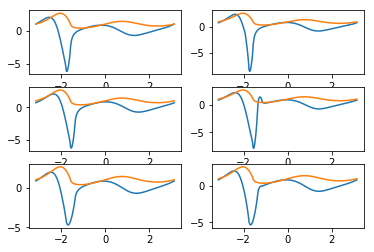

In [12]:
x = np.linspace(-np.pi, np.pi, 200)
f = lambda x: (np.sin(x)+1) ** (np.sin(np.cos(x)))
h = 0.2

plt.subplot(321)
plt.plot(x, forwardEq1(f, x, h))
plt.plot(x, f(x))
plt.subplot(322)
plt.plot(x, forwardEq2(f, x, h))
plt.plot(x, f(x))

plt.subplot(323)
plt.plot(x, backwardEq1(f, x, h))
plt.plot(x, f(x))
plt.subplot(324)
plt.plot(x, backwardEq2(f, x, h))
plt.plot(x, f(x))

plt.subplot(325)
plt.plot(x, centerEq2(f, x, h))
plt.plot(x, f(x))
plt.subplot(326)
plt.plot(x, centerEq4(f, x, h))
plt.plot(x, f(x))

plt.show()

### Problem 3 

$f(x) = (sin(x)+1)^{sin(cos(x)}$

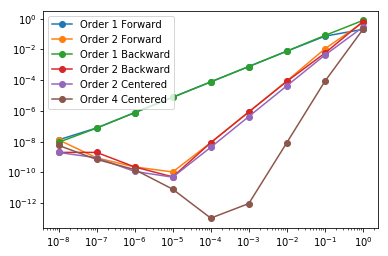

In [13]:
hdis = np.logspace(-8, 0, 9)   # get 9 values from 1e-8 to 1e0 
x0 = 1


f1_error = abs(forwardEq1(f1, x0, hdis) - func(x0))
f2_error = abs(forwardEq2(f1, x0, hdis) - func(x0))
b1_error = abs(backwardEq1(f1, x0, hdis) - func(x0))
b2_error = abs(backwardEq2(f1, x0, hdis) - func(x0))
c2_error = abs(centerEq2(f1, x0, hdis) - func(x0))
c4_error = abs(centerEq4(f1, x0, hdis) - func(x0))

plt.gca()
plt.loglog(hdis, f1_error, '-o', label = "Order 1 Forward")
plt.loglog(hdis, f2_error, '-o', label = "Order 2 Forward")
plt.loglog(hdis, b1_error, '-o', label = "Order 1 Backward")
plt.loglog(hdis, b2_error, '-o', label = "Order 2 Backward")
plt.loglog(hdis, c2_error, '-o', label = "Order 2 Centered")
plt.loglog(hdis, c4_error, '-o', label = "Order 4 Centered")

plt.legend(loc = "upper left")
ax.set_xlabel("h")
ax.set_ylabel("Absolute Error")
plt.show()

### Problem 5

In [14]:
x = sy.symbols('x')
y = sy.symbols('y')

h = max(np.max(np.abs(xgrid)),1)*np.sqrt(np.finfo(float).eps)
eq_F = sy.Matrix(([x**2, x**3-y]))
F = sy.lambdify((x,y),eq_F)
eq_J = eq_F.jacobian((x,y))
J = sy.lambdify((x,y),eq_J)

def func(f, x, h):
    j = f(*sy.flatten(x)).shape[0]
    ret_jacobian = np.empty([j, len(x)])
    for i in range(1,j+1):
        temp_e = np.eye(1,j,i-1)
        temp_arg1 = np.array((x + h*temp_e)).flatten()
        temp_arg2 = np.array((x - h*temp_e)).flatten()
        ret_jacobian[i-1] = ((f(*sy.flatten(temp_arg1)) - f(*sy.flatten(temp_arg2)))/(2*h)).flatten()
    return ret_jacobian.T

print("Jacobian(the analytical result)")
print(J(1,1))

print("Jacobian(the approximated result:")
print(func(F, np.array((1,1)), h))

Jacobian(the analytical result)
[[ 2  0]
 [ 3 -1]]
Jacobian(the approximated result:
[[ 2.  0.]
 [ 3. -1.]]


### Problem 6

/Users/apple/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


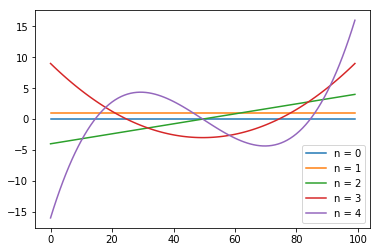

In [15]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

def chebyshev_polynomials(x,n):
    if n == 0:
        return anp.ones_like(x)
    elif n == 1:
        return x
    else:
        return 2*x*chebyshev_polynomials(x,n-1) - chebyshev_polynomials(x,n-2)
    
xgrid = anp.linspace(-1,1,100)
d_cheb = elementwise_grad(chebyshev_polynomials)

for i in range(5):
    plt.plot(d_cheb(xgrid,i), label = "n = " + str(i))
plt.legend()
plt.show()